# TASK #1 : UNDERSTAND THE PROBLEM STATEMENT


Aim of the problem is to detect the presence or absence of cardiovascular disease in person based on the given features.
Features available are:


- Age | Objective Feature | age | int (days)
- Height | Objective Feature | height | int (cm) |
- Weight | Objective Feature | weight | float (kg) |
- Gender | Objective Feature | gender | categorical code |
- Systolic blood pressure | Examination Feature | ap_hi | int |
- Diastolic blood pressure | Examination Feature | ap_lo | int |
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
- Smoking | Subjective Feature | smoke | binary |
- Alcohol intake | Subjective Feature | alco | binary |
- Physical activity | Subjective Feature | active | binary |
- Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

Note that:
- Objective: factual information;
- Examination: results of medical examination;
- Subjective: information given by the patient.

Data Source:https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# read the csv file 
cardio_df = pd.read_csv("cardio_train.csv", sep=";")

In [3]:
cardio_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [4]:
# Drop id

cardio_df = cardio_df.drop(columns = 'id')

In [5]:
# since the age is given in days, we convert it into years

cardio_df['age'] = cardio_df['age']/365

In [6]:
cardio_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
# checking the null values
cardio_df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
# Checking the dataframe information

cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  float64
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.4 MB


In [9]:
# Statistical summary of the dataframe
cardio_df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


MINI CHALLENGE
- Obtain the features of the individuals who are older than 64.8 years old 

# TASK #4: VISUALIZE DATASET

MINI CHALLENGE
- plot the histogram for all features (use 20 bins) 
- plot the correlation matrix and indicate if there exists any correlations between features

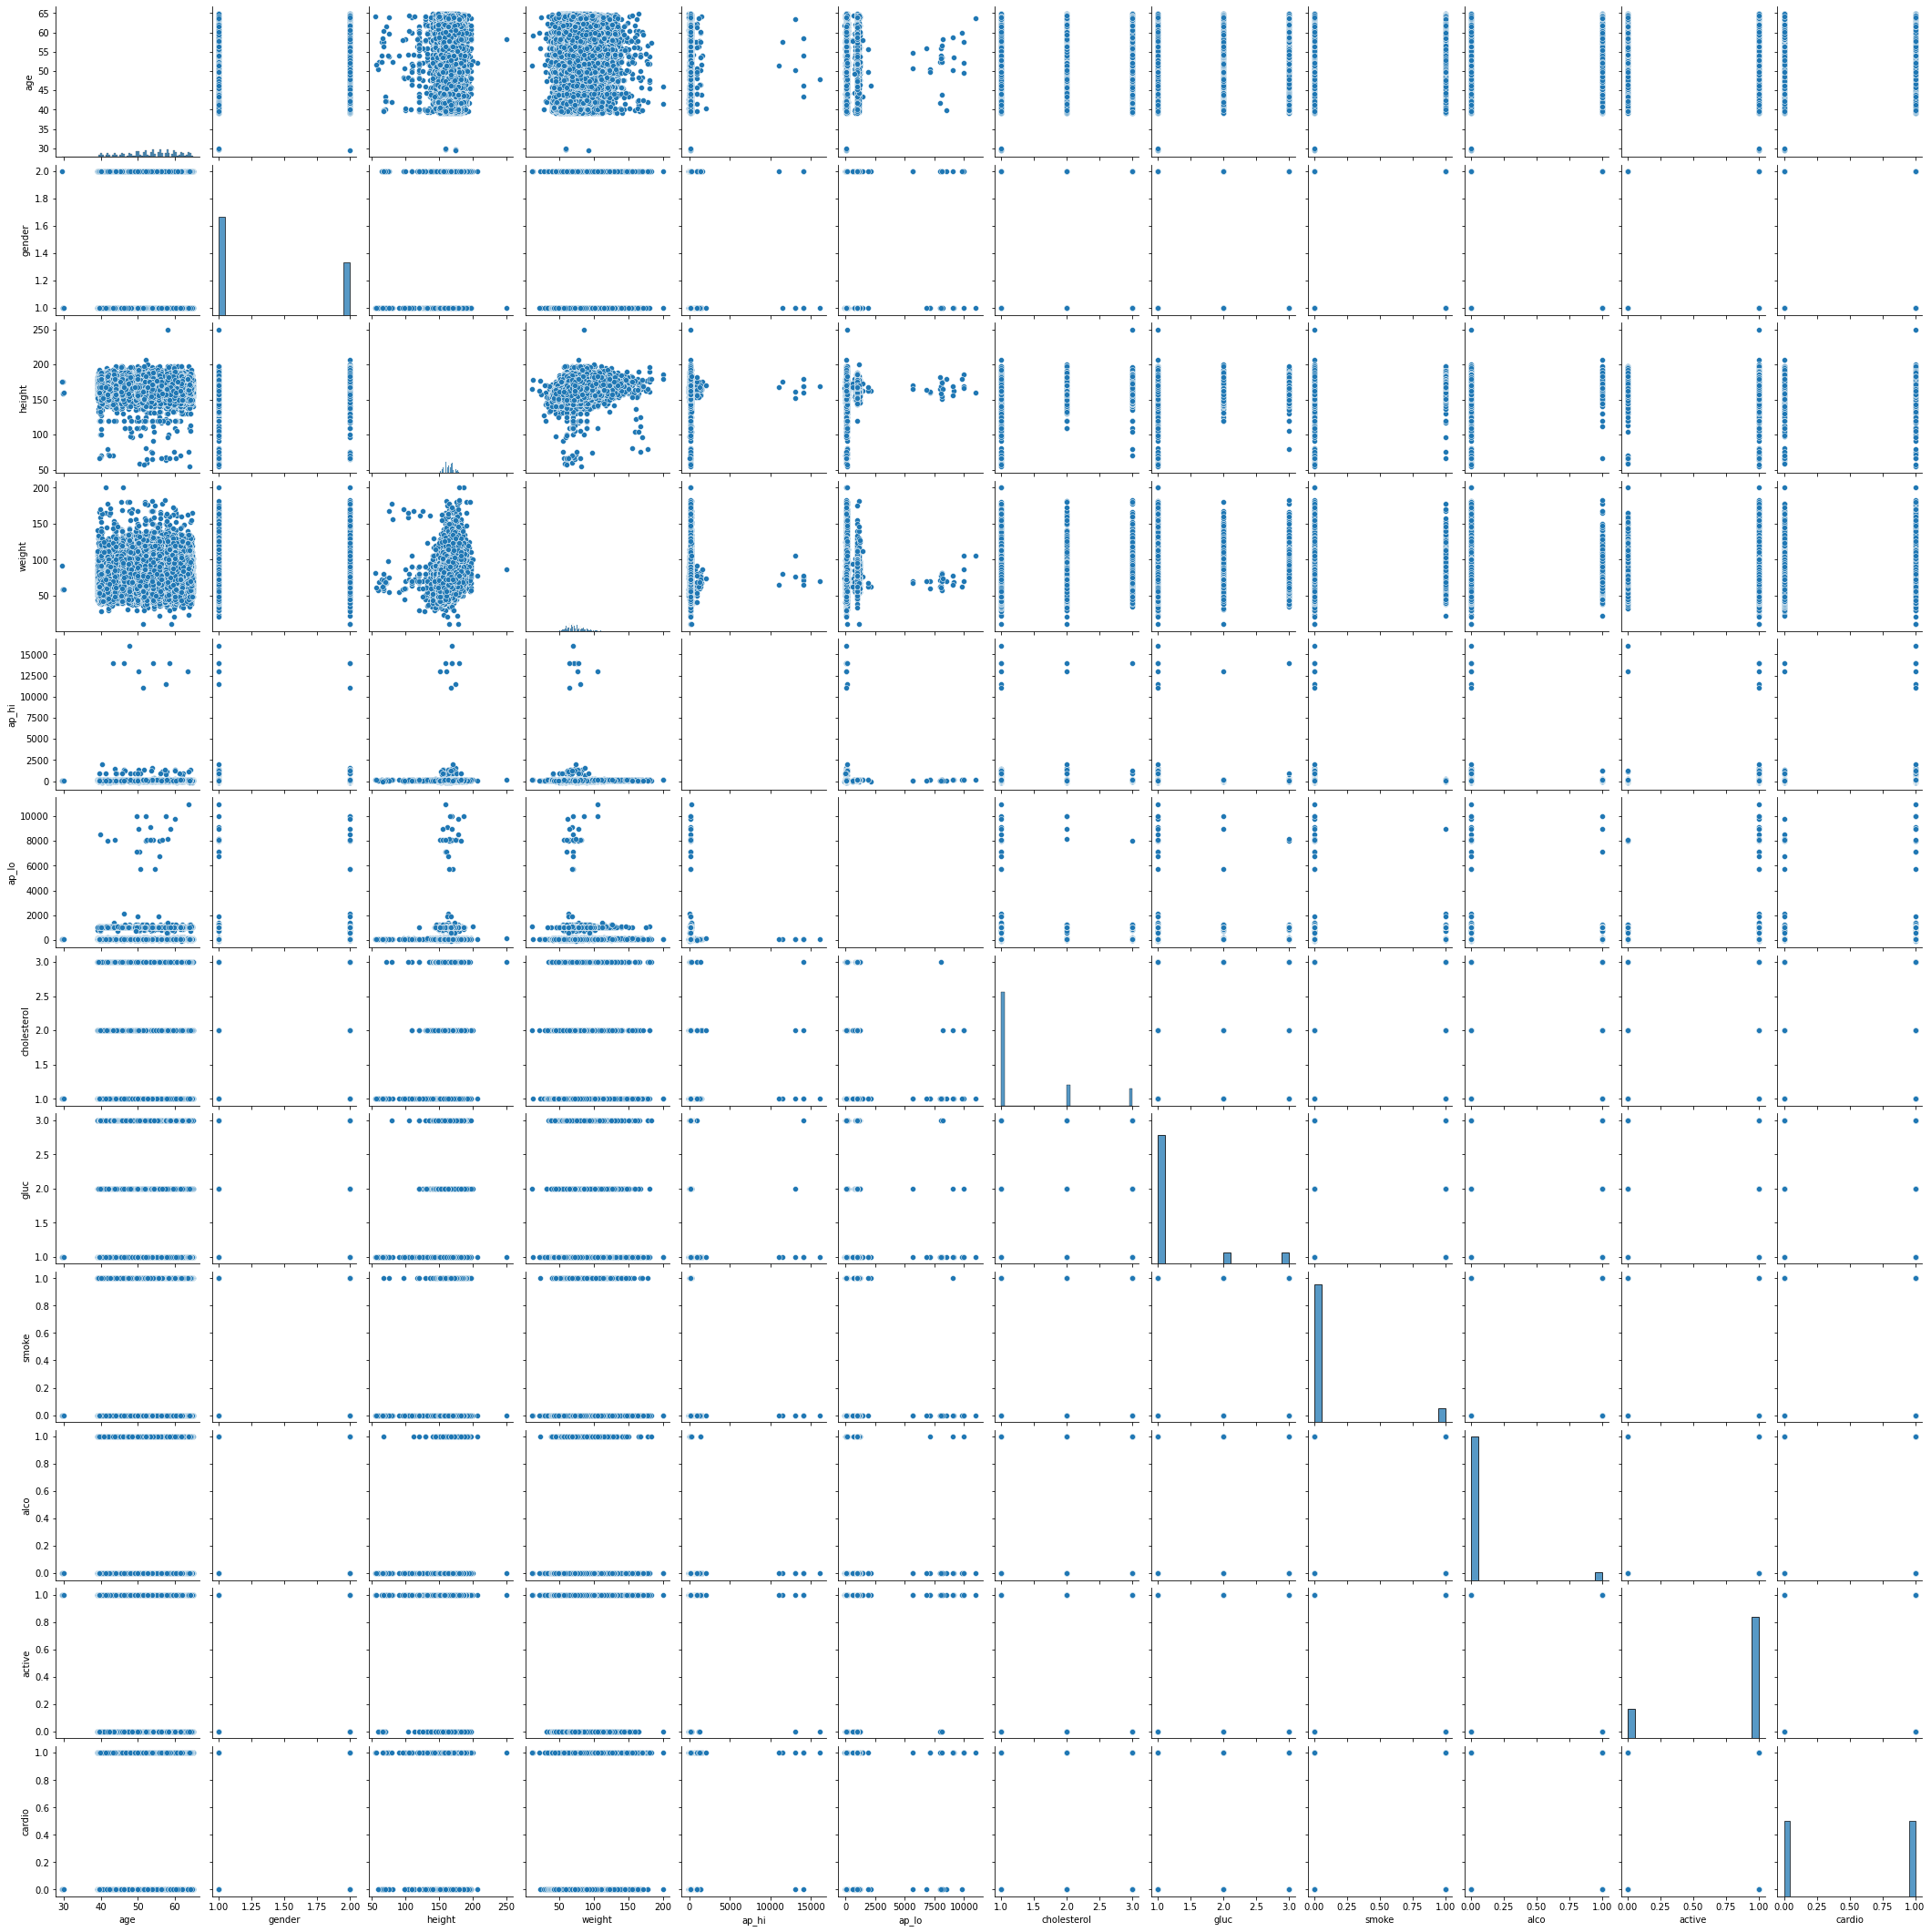

In [10]:
sns.pairplot(cardio_df)

# TASK #5: CREATE TRAINING AND TESTING DATASET

In [11]:
# split the dataframe into target and features

df_target = cardio_df['cardio']
df_final = cardio_df.drop(columns =['cardio'])

In [12]:
cardio_df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [13]:
df_final.shape

(70000, 11)

In [14]:
df_target.shape

(70000,)

In [15]:
#spliting the data in to test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_final, df_target, test_size = 0.2)



In [16]:
X_train.shape

(56000, 11)

In [17]:
y_train.shape

(56000,)

In [18]:
X_test.shape

(14000, 11)

In [19]:
X_test.shape

(14000, 11)

# TASK #6: TRAIN AND TEST XGBOOST MODEL IN LOCAL MODE (NOTE THAT SAGEMAKER BUILT-IN ALGORITHMS ARE NOT USED HERE)

In [20]:
# install xgboost

!pip install xgboost

In [21]:
# use xgboost model in local mode

# note that we have not performed any normalization or scaling since XGBoost is not sensitive to this.
# XGboost is a type of ensemble algorithms and works by selecting thresholds or cut points on features to split a node. 
# It doesn't really matter if the features are scaled or not.


from xgboost import XGBClassifier

# model = XGBClassifier(learning_rate=0.01, n_estimators=100, objective='binary:logistic')
model = XGBClassifier()

model.fit(X_train, y_train)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:47:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [22]:
# make predictions on test data

predict = model.predict(X_test)

In [23]:
predict

array([1, 0, 0, ..., 1, 0, 0])

<AxesSubplot:>

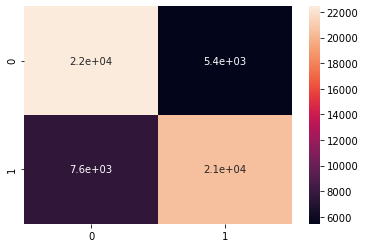

In [24]:
# Assess trained model performance on training dataset
predict_train = model.predict(X_train)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, predict_train)
plt.figure()
sns.heatmap(cm, annot=True)

In [25]:
# print metrics for training dataset

from sklearn.metrics import precision_score, recall_score, accuracy_score

print("Precision = {}".format(precision_score(y_train, predict_train)))
print("Recall = {}".format(recall_score(y_train, predict_train)))
print("Accuracy = {}".format(accuracy_score(y_train, predict_train)))

Precision = 0.7902157164869029
Recall = 0.7298537730814388
Accuracy = 0.7671607142857143


In [26]:
# print metrics for testing dataset

print("Precision = {}".format(precision_score(y_test, predict)))
print("Recall = {}".format(recall_score(y_test, predict)))
print("Accuracy = {}".format(accuracy_score(y_test, predict)))

Precision = 0.7381722915703498
Recall = 0.6970314318975553
Accuracy = 0.7299285714285715


<AxesSubplot:>

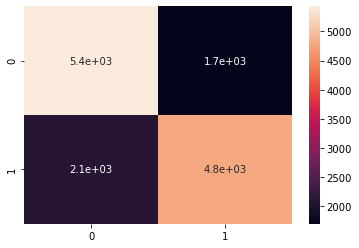

In [27]:
# plot the confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict)
plt.figure()
sns.heatmap(cm, annot=True)

MINI CHALLENGE
 - Retrain the XGBoost algorithm with large number of estimators (n_estimators = 500) and more depth (max_depth = 20)
 - Comment on the accuracy for both the training and testing data 

MINI CHALLENGE
- Attempt to tune the XGBoost classifier using gridsearch, start with the param_grid listed below
- Check out these great resources: https://towardsdatascience.com/fine-tuning-xgboost-in-python-like-a-boss-b4543ed8b1e


In [28]:
param_grid = {
        'gamma': [0.5, 1, 5],   # regularization parameter 
        'subsample': [0.6, 0.8, 1.0], # % of rows taken to build each tree
        'colsample_bytree': [0.6, 0.8, 1.0], # number of columns used by each tree
        'max_depth': [3, 4, 5] # depth of each tree
        }

In [ ]:
y_predict_optim = grid.predict(X_test)

In [ ]:
y_predict_optim

In [ ]:
# print metrics for testing dataset

print("Precision = {}".format(precision_score(y_test, y_predict_optim)))
print("Recall = {}".format(recall_score(y_test, y_predict_optim)))
print("Accuracy = {}".format(accuracy_score(y_test, y_predict_optim)))

# TASK #7: PERFORM DIMENSIONALITY REDUCTION USING PCA ( USING SAGEMAKER)

In [30]:
# Boto3 is the Amazon Web Services (AWS) Software Development Kit (SDK) for Python
# Boto3 allows Python developer to write software that makes use of services like Amazon S3 and Amazon EC2



import sagemaker
import boto3
from sagemaker import Session

# Let's create a Sagemaker session
sagemaker_session = sagemaker.Session()
bucket = Session().default_bucket() 
prefix = 'pca'  # prefix is the subfolder within the bucket.

#Let's get the execution role for the notebook instance. 
# This is the IAM role that you created when you created your notebook instance. You pass the role to the training job.
# Note that AWS Identity and Access Management (IAM) role that Amazon SageMaker can assume to perform tasks on your behalf (for example, reading training results, called model artifacts, from the S3 bucket and writing training results to Amazon S3). 

role = sagemaker.get_execution_role()

In [31]:
import io # The io module allows for dealing with various types of I/O (text I/O, binary I/O and raw I/O). 
import numpy as np
import sagemaker.amazon.common as smac # sagemaker common libary

# Code below converts the data in numpy array format to RecordIO format
# This is the format required by Sagemaker PCA

buf = io.BytesIO() # create an in-memory byte array (buf is a buffer I will be writing to)
df_matrix = df_final.to_numpy() # convert the dataframe into 2-dimensional array
smac.write_numpy_to_dense_tensor(buf, df_matrix)
buf.seek(0)

# When you write to in-memory byte arrays, it increments 1 every time you write to it
# Let's reset that back to zero 

0

In [32]:
import os

# Code to upload RecordIO data to S3
 
# Key refers to the name of the file 
 
key = 'pca'

#following code uploads the data in record-io format to S3 bucket to be accessed later for training
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)

# Let's print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)


print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://sagemaker-us-east-2-542063182511/pca/train/pca


In [33]:
# create output placeholder in S3 bucket to store the PCA output

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('training artifacts will be uploaded to: {}'.format(output_location))

training artifacts will be uploaded to: s3://sagemaker-us-east-2-542063182511/pca/output


In [34]:
# This code is used to get the training container of sagemaker built-in algorithms
# all we have to do is to specify the name of the algorithm, that we want to use

# Let's obtain a reference to the pca container image
# Note that all  models are named estimators
# You don't have to specify (hardcode) the region, get_image_uri will get the current region name using boto3.Session


from sagemaker.amazon.amazon_estimator import get_image_uri


container = get_image_uri(boto3.Session().region_name, 'pca')

The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


In [35]:
# We have pass in the container, the type of instance that we would like to use for training 
# output path and sagemaker session into the Estimator. 
# We can also specify how many instances we would like to use for training


pca = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count=1, 
                                       train_instance_type='ml.c4.xlarge',
                                       output_path=output_location,
                                       sagemaker_session=sagemaker_session)

# We can tune parameters like the number of features that we are passing in, mode of algorithm, mini batch size and number of pca components


pca.set_hyperparameters(feature_dim=11,
                        num_components=6,
                        subtract_mean=False,
                        algorithm_mode='regular',
                        mini_batch_size=100)


# Pass in the training data from S3 to train the pca model


pca.fit({'train': s3_train_data})

# Let's see the progress using cloudwatch logs

train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


2021-03-25 18:48:42 Starting - Starting the training job...
2021-03-25 18:49:06 Starting - Launching requested ML instancesProfilerReport-1616698122: InProgress
......
2021-03-25 18:50:06 Starting - Preparing the instances for training......
2021-03-25 18:51:06 Downloading - Downloading input data...
2021-03-25 18:51:44 Training - Training image download completed. Training in progress.
2021-03-25 18:51:44 Uploading - Uploading generated training model.Docker entrypoint called with argument(s): train
Running default environment configuration script
[03/25/2021 18:51:42 INFO 139888397997888] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-conf.json: {'algorithm_mode': 'regular', 'subtract_mean': 'true', 'extra_components': '-1', 'force_dense': 'true', 'epochs': 1, '_log_level': 'info', '_kvstore': 'dist_sync', '_num_kv_servers': 'auto', '_num_gpus': 'auto'}
[03/25/2021 18:51:42 INFO 139888397997888] Merging with provided configurati


2021-03-25 18:52:06 Completed - Training job completed
Training seconds: 50
Billable seconds: 50


MINI CHALLENGE:
 - Retrain the model with the following number of components 5, 4, and 7 

# TASK #8: DEPLOY THE TRAINED PCA MODEL 

In [36]:
# Deploy the model to perform inference 

pca_reduction = pca.deploy(initial_instance_count = 1,
                                          instance_type = 'ml.m4.xlarge')

-------------!

In [37]:
from sagemaker.predictor import csv_serializer, json_deserializer


# Content type overrides the data that will be passed to the deployed model, since the deployed model expects data in text/csv format.

# Serializer accepts a single argument, the input data, and returns a sequence of bytes in the specified content type

# Deserializer accepts two arguments, the result data and the response content type, and return a sequence of bytes in the specified content type.

# Reference: https://sagemaker.readthedocs.io/en/stable/predictors.html


# pca_reduction.content_type = 'text/csv'
pca_reduction.serializer = csv_serializer
pca_reduction.deserializer = json_deserializer

In [38]:
# make prediction on the test data

result = pca_reduction.predict(np.array(df_final))

The csv_serializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
The json_deserializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [39]:
result # results are in Json format

{'projections': [{'projection': [-0.2891036570072174,
    3.9943747520446777,
    -12.549570083618164,
    64.24058532714844,
    36.82109451293945,
    -217.8480682373047]},
  {'projection': [1.0957019329071045,
    -4.777677059173584,
    12.364439010620117,
    44.58211135864258,
    45.66633987426758,
    -241.0251007080078]},
  {'projection': [1.336683988571167,
    1.7997606992721558,
    -9.735824584960938,
    53.424842834472656,
    55.75396728515625,
    -223.01675415039062]},
  {'projection': [-0.4163884222507477,
    6.149697303771973,
    5.682126998901367,
    43.042396545410156,
    45.00962448120117,
    -257.2431640625]},
  {'projection': [-0.14980435371398926,
    2.6750032901763916,
    -13.209842681884766,
    63.61091995239258,
    44.3466911315918,
    -192.79931640625]},
  {'projection': [0.8930057883262634,
    -10.548048973083496,
    -2.894824981689453,
    50.40694808959961,
    40.3013801574707,
    -217.75537109375]},
  {'projection': [0.9225766658782959,
 

In [40]:
# Since the results are in Json format, we access the scores by iterating through the scores in the predictions
predictions = np.array([r['projection'] for r in result['projections']])

In [41]:
predictions

array([[-2.89103657e-01,  3.99437475e+00, -1.25495701e+01,
         6.42405853e+01,  3.68210945e+01, -2.17848068e+02],
       [ 1.09570193e+00, -4.77767706e+00,  1.23644390e+01,
         4.45821114e+01,  4.56663399e+01, -2.41025101e+02],
       [ 1.33668399e+00,  1.79976070e+00, -9.73582458e+00,
         5.34248428e+01,  5.57539673e+01, -2.23016754e+02],
       ...,
       [ 9.36102509e-01,  6.50153160e+00,  2.10844498e+01,
         4.50918350e+01,  7.45691071e+01, -2.82263916e+02],
       [ 1.15454197e-03, -8.17430115e+00, -2.97180176e+00,
         5.16770020e+01,  5.14335823e+01, -2.34024872e+02],
       [ 3.68915290e-01, -1.09633231e+00, -4.88934517e+00,
         6.41318741e+01,  4.39791260e+01, -2.28002136e+02]])

In [42]:
predictions.shape

(70000, 6)

In [43]:
# Delete the end-point

pca_reduction.delete_endpoint()

# TASK #9: TRAIN AND EVALUATE XGBOOST MODEL ON DATA AFTER DIMENSIONALITY REDUCTION (USING SAGEMAKER)

In [ ]:
predictions.shape

In [ ]:
# Convert the array into dataframe in a way that target variable is set as the first column and is followed by feature columns
# This is because sagemaker built-in algorithm expects the data in this format

train_data = pd.DataFrame({'Target':df_target})
train_data

In [ ]:
for i in range(predictions.shape[1]):
    train_data[i] = predictions[:,i]

In [ ]:
train_data.head()

In [ ]:
train_data_size = int(0.9 * train_data.shape[0])
train_data_size

In [ ]:
# shuffle the data in dataframe and then split the dataframe into train, test and validation sets.

import sklearn 

train_data = sklearn.utils.shuffle(train_data)
train, test, valid = train_data[:train_data_size], train_data[train_data_size:train_data_size + 3500], train_data[train_data_size + 3500:]


In [ ]:
train.shape, test.shape,valid.shape

In [ ]:
X_test, y_test = test.drop(columns = ['Target']), test['Target']

In [ ]:
# save train_data and validation_data as csv files

train.to_csv('train.csv',header = False, index = False)
valid.to_csv('valid.csv',header = False, index = False)

In [ ]:
prefix = 'XGBoost-Classifier'
key = 'XGBoost-Classifier'

In [ ]:
# read the data from csv file and then upload the data to s3 bucket
with open('train.csv','rb') as f:
    # The following code uploads the data into S3 bucket to be accessed later for training
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(f)

# Let's print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

In [ ]:
# reading the data from csv file and then upload the data to s3 bucket
with open('valid.csv','rb') as f:
    # The following code uploads the data into S3 bucket to be accessed later for training
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'valid', key)).upload_fileobj(f)

# Let's print out the validation data location in s3
s3_valid_data = 's3://{}/{}/valid/{}'.format(bucket, prefix, key)
print('uploaded validation data location: {}'.format(s3_valid_data))

In [ ]:
# creates output placeholder in S3 bucket to store the linear learner output

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('training artifacts will be uploaded to: {}'.format(output_location))

In [ ]:
# This code is used to get the training container of sagemaker built-in algorithms
# all we have to do is to specify the name of the algorithm, that we want to use

# Let's obtain a reference to the XGBoost container image
# Note that all  models are named estimators
# You don't have to specify (hardcode) the region, get_image_uri will get the current region name using boto3.Session


container = get_image_uri(boto3.Session().region_name, 'xgboost','0.90-2')

In [ ]:
# We have pass in the container, the type of instance that we would like to use for training 
# output path and sagemaker session into the Estimator. 
# We can also specify how many instances we would like to use for training


Xgboost_classifier = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count=1, 
                                       train_instance_type='ml.m4.xlarge',
                                       output_path=output_location,
                                       sagemaker_session=sagemaker_session)

# To improve the performance of the model, a hyperparameters tuning job need to be run 

Xgboost_classifier.set_hyperparameters(max_depth=3,
                           objective='multi:softmax',
                           num_class= 2,
                           eta = 0.5,
                           num_round = 150
                           )

In [ ]:
# Create "train", "validation" channels to feed in the model
# Source: https://docs.aws.amazon.com/sagemaker/latest/dg/sagemaker-algo-docker-registry-paths.html


train_input = sagemaker.session.s3_input(s3_data = s3_train_data, content_type='csv',s3_data_type = 'S3Prefix')
valid_input = sagemaker.session.s3_input(s3_data = s3_valid_data, content_type='csv',s3_data_type = 'S3Prefix')

Xgboost_classifier.fit({'train': train_input, 'validation': valid_input})

MINI CHALLENGE
- Retrain the XGBoost model with deeper trees (max_depth)

# TASK #10: DEPLOY AND TEST THE TRAINED XGBOOST MODEL 

In [ ]:
# Deploy the model to perfrom inference 

Xgboost_classifier = Xgboost_classifier.deploy(initial_instance_count = 1,
                                          instance_type = 'ml.m4.xlarge')

In [ ]:
# Content type over-rides the data that will be passed to the deployed model, since the deployed model expects data in text/csv format, we specify this as content -type.
# Serializer accepts a single argument, the input data, and returns a sequence of bytes in the specified content type
#Reference: https://sagemaker.readthedocs.io/en/stable/predictors.html

from sagemaker.predictor import csv_serializer, json_deserializer

Xgboost_classifier.serializer = csv_serializer


In [ ]:
# make prediction

XGB_prediction = Xgboost_classifier.predict(np.array(X_test))

In [ ]:
XGB_prediction

In [ ]:
# custom code to convert the values in bytes format to array

def bytes_2_array(x):
    
    #makes entire prediction as string and splits based on ','
    l = str(x).split(',')
    
    #Since the first element contains unwanted characters like (b,',') we remove them
    l[0] = l[0][2:]
    #same-thing as above remove the unwanted last character (')
    l[-1] = l[-1][:-1]
    
    #iterating through the list of strings and converting them into float type
    for i in range(len(l)):
        l[i] = float(l[i])
        
    #converting the list to into array
    l = np.array(l).astype('float32')
    
    #reshape one-dimensional array to two-dimentaional array
    return l.reshape(-1,1)

In [ ]:
predicted_values = bytes_2_array(XGB_prediction)

In [ ]:
predicted_values

In [ ]:
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)

In [ ]:
y_test

In [ ]:
# plot metrics

from sklearn.metrics import precision_score, recall_score, accuracy_score

print("Precision = {}".format(precision_score(y_test, predicted_values, average='macro')))
print("Recall = {}".format(recall_score(y_test, predicted_values, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, predicted_values)))

In [ ]:
# plot confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_values)
plt.figure()
sns.heatmap(cm, annot=True)

In [ ]:
# Delete the end-point

Xgboost_classifier.delete_endpoint()

# EXCELLENT JOB

MINI CHALLENGE SOLUTIONS

In [ ]:
cardio_df [ cardio_df['ap_hi'] == 16020]
cardio_df [ cardio_df['age'] > 64.8]

In [ ]:
cardio_df.hist(bins = 30, figsize = (20,20), color = 'r')
# get the correlation matrix

corr_matrix = cardio_df.corr()
corr_matrix
# plotting the correlation matrix
plt.figure(figsize = (16,16))
sns.heatmap(corr_matrix, annot = True)
plt.show()


In [ ]:
xgb_model = XGBClassifier(learning_rate=0.01, n_estimators=100, objective='binary:logistic')
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(xgb_model, param_grid, refit = True, verbose = 4)
grid.fit(X_train, y_train)